<a href="https://colab.research.google.com/github/SatyamVyas04/MasteringPython/blob/main/MLBasics/AIML_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the provided file path
file_path = './data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,Unnamed: 0,market_place,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Sentiment_books,review_month,review_day,review_year
0,0,"""US""","""25933450""","""RJOVP071AVAJO""","""0439873800""","""84656342""","""There Was an Old Lady Who Swallowed a Shell!""","""Books""",1,0,0,0 \t(N),1 \t(Y),"""Five Stars""","""I love it and so does my students!""",2015-08-31,positive,August,Monday,2015
1,1,"""US""","""1801372""","""R1ORGBETCDW3AI""","""1623953553""","""729938122""","""I Saw a Friend""","""Books""",1,0,0,0 \t(N),1 \t(Y),"""Please buy ""I Saw a Friend""! Your children wi...","""My wife and I ordered 2 books and gave them a...",2015-08-31,positive,August,Monday,2015
2,2,"""US""","""5782091""","""R7TNRFQAOUTX5""","""142151981X""","""678139048""","""Black Lagoon, Vol. 6""","""Books""",1,0,0,0 \t(N),1 \t(Y),"""Shipped fast.""","""Great book just like all the others in the se...",2015-08-31,positive,August,Monday,2015
3,3,"""US""","""32715830""","""R2GANXKDIFZ6OI""","""014241543X""","""712432151""","""If I Stay""","""Books""",1,0,0,0 \t(N),0 \t(N),"""Five Stars""","""So beautiful""",2015-08-31,positive,August,Monday,2015
4,4,"""US""","""14005703""","""R2NYB6C3R8LVN6""","""1604600527""","""800572372""","""Stars 'N Strips Forever""","""Books""",1,2,2,0 \t(N),1 \t(Y),"""Five Stars""","""Enjoyed the author's story and his quilts are...",2015-08-31,positive,August,Monday,2015


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   market_place       100 non-null    object
 2   customer_id        100 non-null    object
 3   review_id          100 non-null    object
 4   product_id         100 non-null    object
 5   product_parent     100 non-null    object
 6   product_title      100 non-null    object
 7   product_category   100 non-null    object
 8   star_rating        100 non-null    int64 
 9   helpful_votes      100 non-null    int64 
 10  total_votes        100 non-null    int64 
 11  vine               100 non-null    object
 12  verified_purchase  100 non-null    object
 13  review_headline    100 non-null    object
 14  review_body        100 non-null    object
 15  review_date        100 non-null    object
 16  Sentiment_books    100 non-null    object
 17

In [13]:
df.describe()

,Unnamed: 0,star_rating,helpful_votes,total_votes,review_year
count,100.000000,100.000000,100.000000,100.000000,100.0
mean,49.500000,0.840000,0.540000,0.960000,2015.0
std,29.011492,0.368453,1.298173,2.420118,0.0
min,0.000000,0.000000,0.000000,0.000000,2015.0
25%,24.750000,1.000000,0.000000,0.000000,2015.0
50%,49.500000,1.000000,0.000000,0.000000,2015.0
75%,74.250000,1.000000,1.000000,1.000000,2015.0
max,99.000000,1.000000,9.000000,14.000000,2015.0


In [24]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Select target variable (binary classification task).
# Choosing 'Sentiment_books' as target, encoding 'positive' = 1 and others as 0.
df['Sentiment_encoded'] = df['Sentiment_books'].apply(lambda x: 1 if x == "positive" else 0)

# Step 2: Feature selection - Using numerical columns as features for simplicity.
features = ['star_rating', 'helpful_votes', 'total_votes']

X = df[features]
y = df['Sentiment_encoded']

# Step 3: Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 4: Initialize and train the Logistic Regression model.
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate the model.
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(accuracy)

1.0


In [18]:
print(conf_matrix)

[[ 5  0]
 [ 0 25]]


In [19]:
print(classification_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        25

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



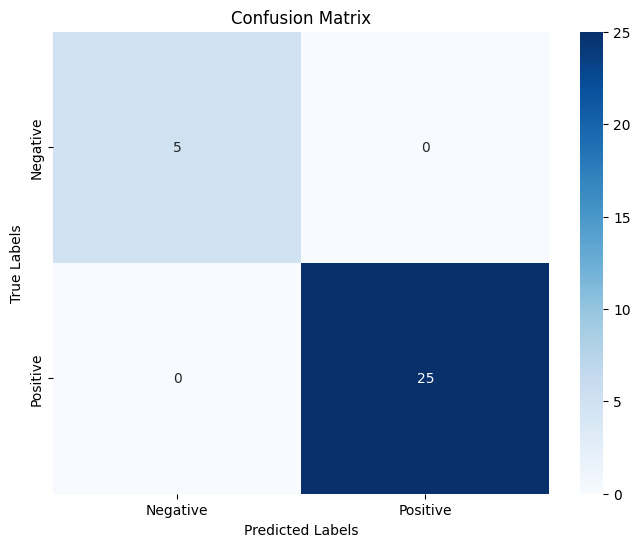

In [20]:
# Plot confusion matrix for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()